In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from decimal import Decimal
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, FuncFormatter
import configparser
from google.colab import drive
drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/Visualization/Data/'
path_img = '/content/gdrive/My Drive/Visualization/Images/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


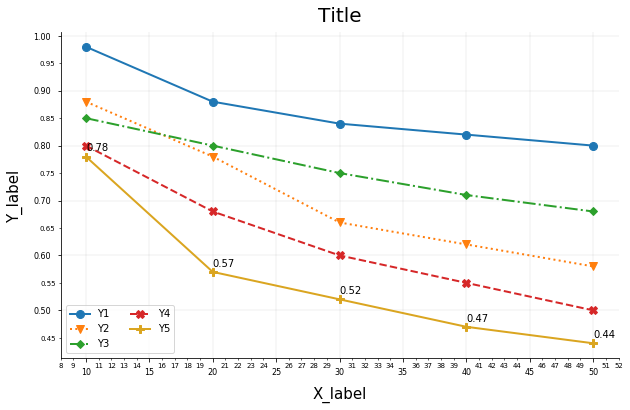

In [12]:
# loading and preparing data
df = pd.DataFrame({'X' :[10,20,30,40,50],
                   'Y1':[0.98,0.88,0.84,0.82,0.8],
                   'Y2':[0.88,0.78,0.66,0.62,0.58],
                   'Y3':[0.85,0.80,0.75,0.71,0.68],
                   'Y4':[0.80,0.68,0.60,0.55,0.50],
                   'Y5':[0.78,0.57,0.52,0.47,0.44],
                   'Y6':[0.75,0.52,0.50,0.45,0.42]})

# marker labels setting 
marker = ['o','v','D','X','P']
# linestyle labels setting 
linestyle = ['-',':','-.','--','-']
# color labels setting 
color = ['goldenrod','black','grey']

# allow multiple graphing
LineWidth = 2.0

# plot size setting 
fig, ax = plt.subplots(figsize=(10,6))

# drawing plot
plt.plot('X', 'Y1', data=df, marker=marker[0], markersize=8, linestyle=linestyle[0], linewidth=LineWidth)
plt.plot('X', 'Y2', data=df, marker=marker[1], markersize=8, linestyle=linestyle[1], linewidth=LineWidth)
plt.plot('X', 'Y3', data=df, marker=marker[2], markersize=6, linestyle=linestyle[2], linewidth=LineWidth)
plt.plot('X', 'Y4', data=df, marker=marker[3], markersize=8, linestyle=linestyle[3], linewidth=LineWidth)
plt.plot('X', 'Y5', data=df, marker=marker[4], markersize=8, linestyle=linestyle[4], linewidth=LineWidth, color=color[0])

# title and position
ax.set_title('Title', fontsize=20, loc='center',pad=10)

# x,y label and size
# labelpad: Spacing in points between the label and the x-axis.
plt.xlabel('X_label', fontsize=15, labelpad=10)
plt.ylabel('Y_label', fontsize=15, labelpad=10)

# avoid overlap of major and minor tick label
def x_minor_tick(x,pos):
    if not x % 5.0:
        return ""
    return "%d" % x

def y_minor_tick(x,pos):
    if not Decimal(str(round(x,2))) % Decimal('0.1'): # deal with modulus for float number
        return ""
    return "%.2f" % x

# major and minor ticks for x axis
majorLocator = MultipleLocator(5)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(1)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator) # for the minor ticks, use no labels; default NullFormatter
ax.xaxis.set_minor_formatter(FuncFormatter(x_minor_tick))

# major and minor ticks for y axis
majorLocator = MultipleLocator(0.1)
majorFormatter = FormatStrFormatter('%.2f')
minorLocator = MultipleLocator(0.05)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.set_major_formatter(majorFormatter)
ax.yaxis.set_minor_formatter(FuncFormatter(y_minor_tick))
ax.tick_params(axis='both', which='major', labelsize=8, pad = 6)
ax.tick_params(axis='both', which='minor', labelsize=7, pad = 3)

# presenting values on graph
for x,y in zip(df['X'].values.tolist(),df['Y5'].values.tolist()):
    plt.text(x, y+0.01, str(round(y,2)), color = color[1])

# top and right borders removing 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# background grid setting 
ax.xaxis.grid(color =color[2], linewidth=0.2, alpha=0.6) # alpha: soft color
ax.yaxis.grid(color =color[2], linewidth=0.2, alpha=0.6) # alpha: soft color

# legend
plt.legend(ncol=2, loc='lower left')

# save image as pdf to path folder
# bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
plt.savefig(path_img+'line.jpg', bbox_inches='tight')
# showing the image
plt.show()